In [1]:
# Import required libraries

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import squarify

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

In [10]:
!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


In [12]:
# Data cleaning

In [13]:
UNIQLO = pd.read_csv("UNIQLO.csv")

In [14]:
UNIQLO.head()
UNIQLO.isnull()

,Store ID,Location,Channel,Gender,Age,Product category,The number of customers,Sales revenue,Order quantity,The number of products purchased,Cost,Price,Profit,Order date,Days of the week
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19696,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19697,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19698,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19699,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
UNIQLO.isnull().any(axis = 1)

0        False
1        False
2        False
3        False
4        False
         ...  
19696     True
19697     True
19698     True
19699     True
19700     True
Length: 19701, dtype: bool

In [16]:
UNIQLO_cleaned = UNIQLO.dropna()

In [17]:
UNIQLO_cleaned
UNIQLO_cleaned.isnull().any()
# Check to see if there are any missing null values that have not been processed

Store ID                            False
Location                            False
Channel                             False
Gender                              False
Age                                 False
Product category                    False
The number of customers             False
Sales revenue                       False
Order quantity                      False
The number of products purchased    False
Cost                                False
Price                               False
Profit                              False
Order date                          False
Days of the week                    False
dtype: bool

In [18]:
# Descriptive statistics

In [19]:
df_ds = UNIQLO_cleaned

In [20]:
df_ds.describe()

,Store ID,The number of customers,Sales revenue,Order quantity,The number of products purchased,Cost,Price,Profit
count,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000
mean,334.431376,1.727402,171.600123,1.753733,1.993879,45.915730,84.434331,81.114449
std,229.897750,1.915604,297.486300,1.997408,2.517268,20.225933,49.216734,194.005903
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000,-650.000000
25%,142.000000,1.000000,59.000000,1.000000,1.000000,29.000000,49.000000,16.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000,42.000000
75%,480.000000,2.000000,198.000000,2.000000,2.000000,59.000000,99.000000,100.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000,8408.000000


In [21]:
df_ds.groupby(['Location','Channel'])['Sales revenue'].mean()

Location   Channel
Beijing    offline    243.705828
Chengdu    offline    143.939426
Chongqing  offline    157.611738
           online     153.600955
Guangzhou  offline    139.503471
           online     165.459215
Hangzhou   offline    168.418802
Shanghai   offline    165.960767
           online     205.552240
Shenzhen   offline    182.548392
Wuhan      offline    165.373630
           online     195.104860
Xian       offline    138.661845
           online     134.473732
jing       offline    268.036705
Name: Sales revenue, dtype: float64

In [22]:
df_ds.groupby(['Location','Gender'])['Sales revenue'].mean()

Location   Gender
Beijing    female    277.325405
           male      189.599323
Chengdu    female    161.462922
           male      117.637618
Chongqing  female    173.562076
           male      126.268472
Guangzhou  female    168.529190
           male      130.161795
Hangzhou   female    191.070522
           male      130.841822
Shanghai   female    195.122613
           male      135.956159
Shenzhen   female    207.024048
           male      138.031758
Wuhan      female    201.940395
           male      137.129809
Xian       female    148.030069
           male      121.299502
jing       female    319.835709
           male      171.935921
Name: Sales revenue, dtype: float64

In [23]:
df_ds.groupby(['Product category'])['Profit'].mean()

Product category
T-shirt         66.965650
accessories    201.434223
jeans           58.752427
new product    111.769493
shorts          32.684734
skirt          125.069335
socks           46.566556
sports          31.232369
sweater        139.450254
Name: Profit, dtype: float64

In [24]:
# Data analysis -- Product dimension -- BCG Matrix

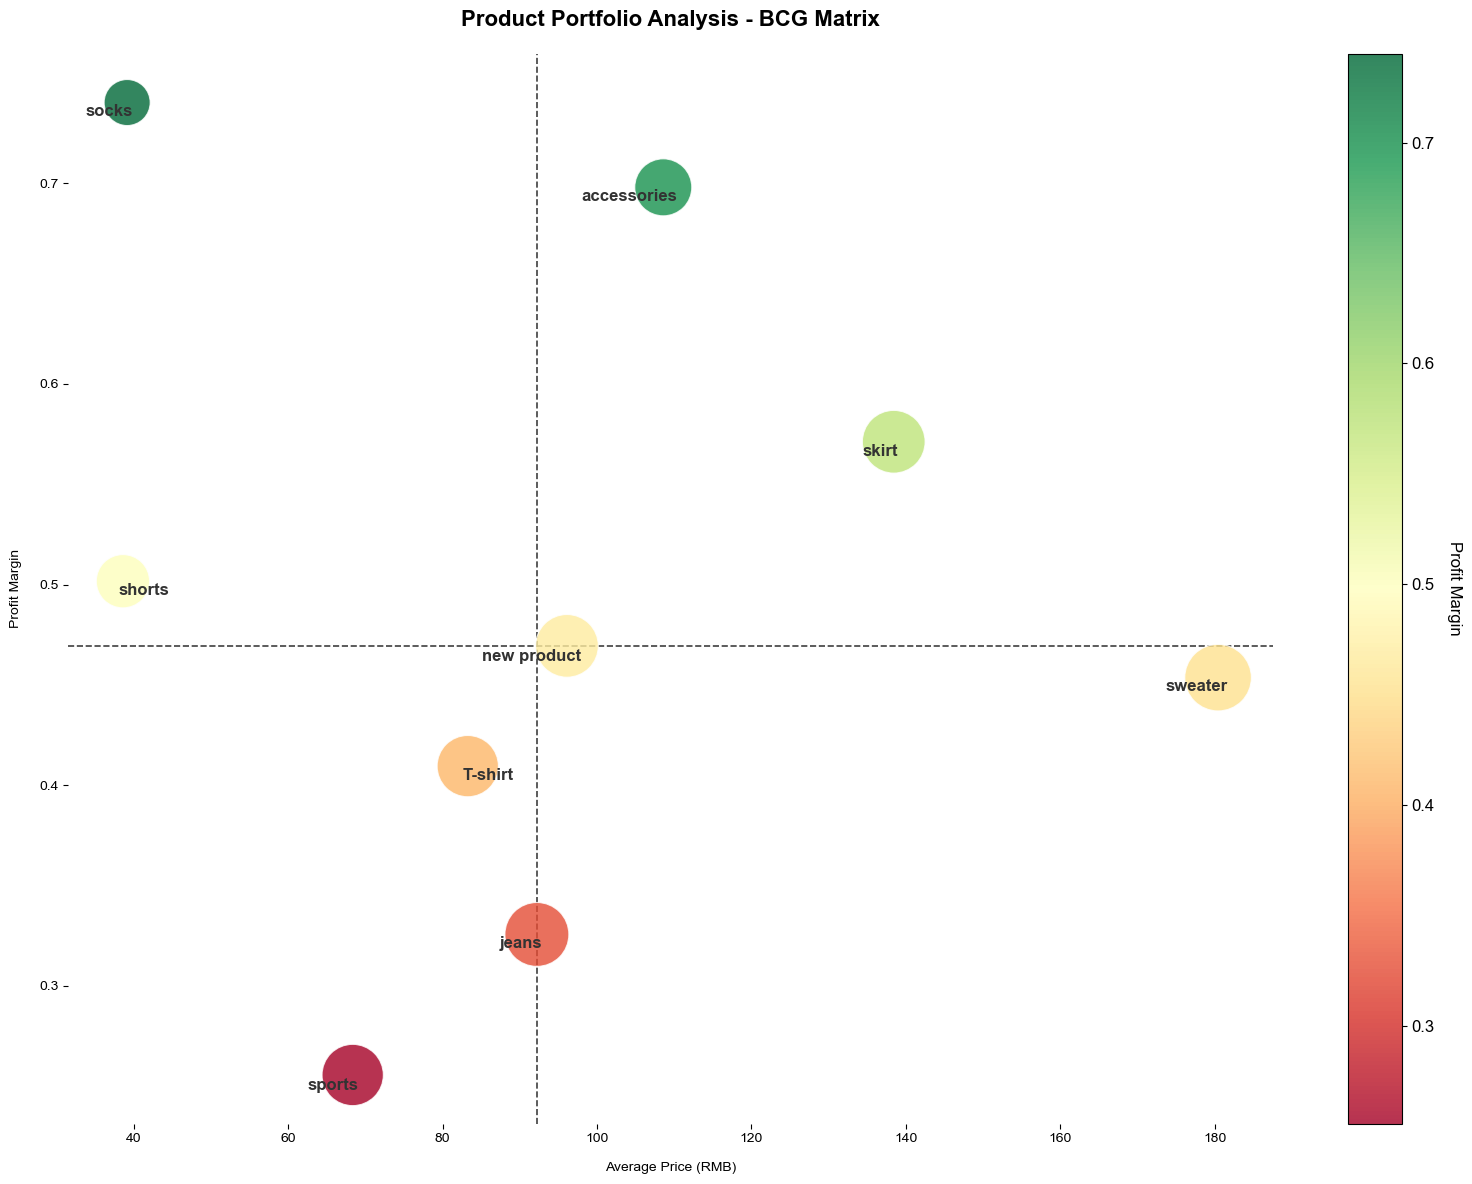

In [25]:
from adjustText import adjust_text

df_pd = UNIQLO_cleaned.copy()

# Data aggregate
product_group = df_pd.groupby('Product category').agg(
    avg_price=('Price', 'mean'),
    avg_profit=('Profit', 'mean'),
    avg_cost=('Cost', 'mean'),
    avg_revenue=('Sales revenue','mean')
).reset_index()

# Calculate the profit margin
product_group['profit_margin'] = product_group['avg_profit'] / product_group['avg_revenue']

# Calculate the bubble size
product_group['bubble_size'] = np.log(product_group['avg_cost']) * 500

# Create a canvas
plt.figure(figsize=(16, 12))
ax = plt.gca()

# Set the global font
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 12
})

# Draw the bubble chart
scatter = ax.scatter(
    x=product_group['avg_price'],
    y=product_group['profit_margin'],
    s=product_group['bubble_size'],
    c=product_group['profit_margin'],  
    cmap='RdYlGn',
    alpha=0.8,
    edgecolors='w',
    linewidths=0.8,
    zorder=2
)

# Add color bars
cbar = plt.colorbar(scatter)
cbar.set_label('Profit Margin', rotation=270, labelpad=20)

# Add the four-quadrant line
median_price = product_group['avg_price'].median()
median_margin = product_group['profit_margin'].median()

ax.axvline(median_price, color='#404040', linestyle='--', linewidth=1.2, zorder=1)
ax.axhline(median_margin, color='#404040', linestyle='--', linewidth=1.2, zorder=1)



# Add label
texts = []
for i, row in product_group.iterrows():
    texts.append(ax.text(
        row['avg_price'],
        row['profit_margin'],
        row['Product category'],
        fontsize=12,
        color='#333333',
        ha='center',
        va='center',
        weight='semibold'
    ))

# Adjust the position of the label
adjust_text(texts)

# Remove the chart bounding lines
for spine in ax.spines.values():
    spine.set_visible(False)

#  Set the coordinate axes
ax.set_xlabel('Average Price (RMB)', labelpad=12)
ax.set_ylabel('Profit Margin', labelpad=12)
ax.set_title('Product Portfolio Analysis - BCG Matrix', pad=20, fontsize=16, weight='bold')




plt.tight_layout()
plt.show()


In [26]:
# Data analysis -- Product dimension -- Average sales revenue

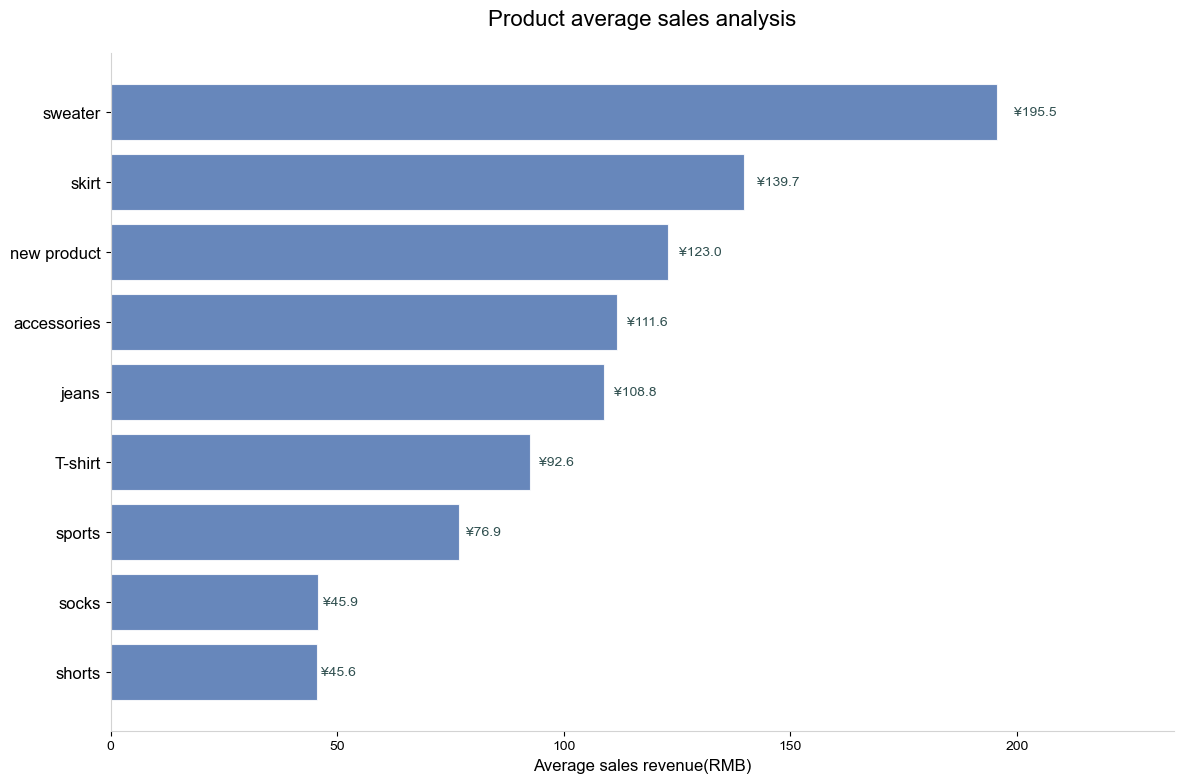

In [27]:
df_avg_revenue = UNIQLO_cleaned.copy()

# Calculate the average sales vrevenue of each product category
product_data = df_avg_revenue.groupby('Product category').agg(
    total_sales=('Sales revenue', 'sum'),
    total_orders=('Order quantity', 'sum')
).reset_index()


product_data['avg_sales'] = product_data['total_sales'] / product_data['total_orders']
product_data = product_data[product_data['total_orders'] > 0]  

# Sort by average sales revenue
product_data = product_data.sort_values('avg_sales', ascending=True)


plt.figure(figsize=(12, 8), dpi=100)

# Draw the horizontal bar chart
bars = plt.barh(
    y=product_data['Product category'],
    width=product_data['avg_sales'],
    color='#4C72B0',         
    edgecolor='white',       
    linewidth=0.8,           
    alpha=0.85               
)

# Add data tags
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 1.02,  
        bar.get_y() + bar.get_height()/2,
        f'¥{width:.1f}',
        va='center',
        ha='left',
        fontsize=10,
        color='#2F4F4F' 
    )


plt.title('Product average sales analysis', fontsize=16, pad=20)
plt.xlabel('Average sales revenue(RMB)', fontsize=12)
plt.xlim(0, product_data['avg_sales'].max() * 1.2)  


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d3d3d3')
ax.spines['bottom'].set_color('#d3d3d3')


# Scale label setting
ax.tick_params(axis='y', labelsize=12)
plt.xticks(fontsize=10)



plt.tight_layout()
plt.show()



In [28]:
# Data analysis -- Product dimension -- Pareto diagram

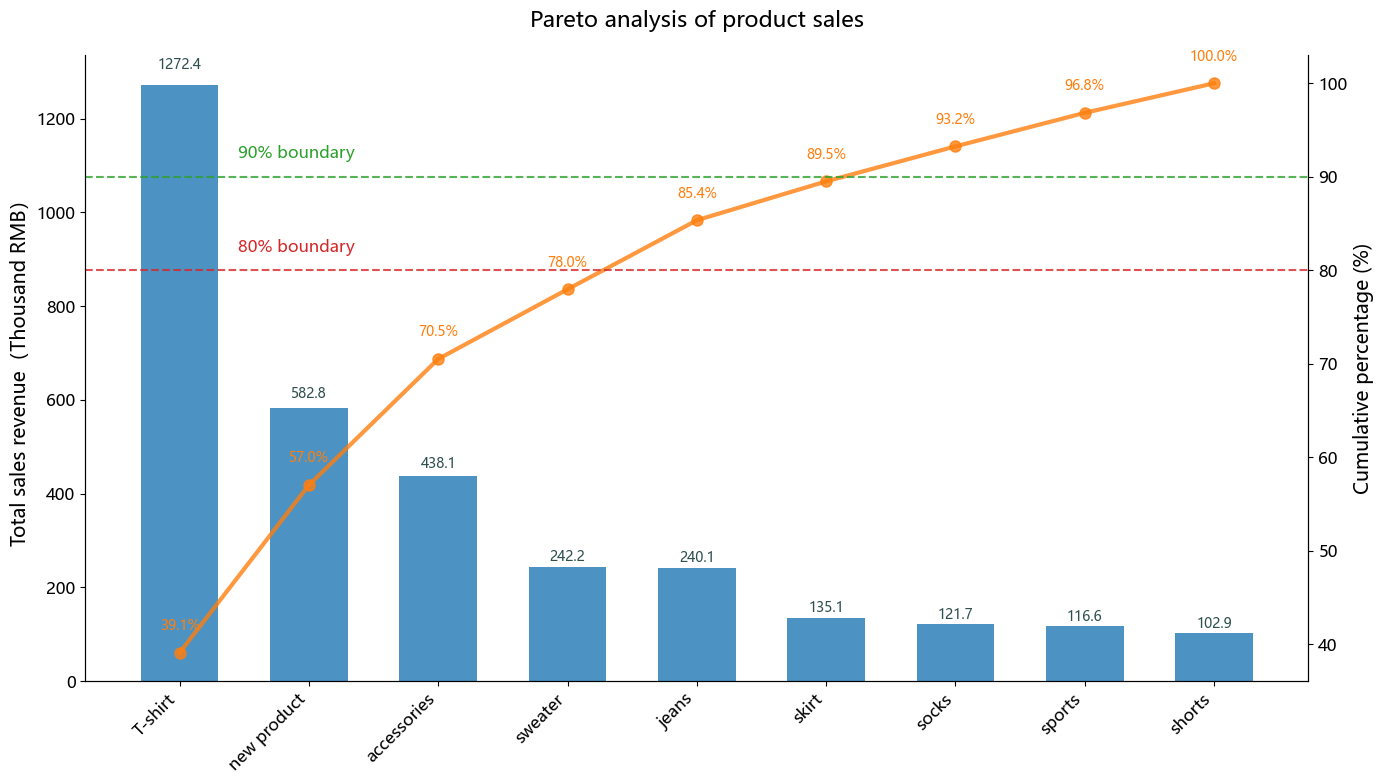

In [29]:
df_pareto = UNIQLO_cleaned.copy()

product_sales = df_pareto.groupby('Product category')['Sales revenue'].sum().reset_index()
product_sales = product_sales.sort_values('Sales revenue', ascending=False).reset_index(drop=True)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False  

# Calculate the cumulative percentage
product_sales['cum_percent'] = (product_sales['Sales revenue'].cumsum() / 
                               product_sales['Sales revenue'].sum() * 100)


fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Bar chart
bars = ax1.bar(
    product_sales.index,
    product_sales['Sales revenue']/1000,
    color='#1f77b4',
    alpha=0.8,
    width=0.6
)

# Cumulative curve
line = ax2.plot(
    product_sales.index,
    product_sales['cum_percent'],
    color='#ff7f0e',
    marker='o',
    markersize=8,
    linewidth=3,
    alpha=0.8
)

# Add the dividing line
ax2.axhline(80, color='#d62728', linestyle='--', linewidth=1.5, alpha=0.8)
ax2.axhline(90, color='#2ca02c', linestyle='--', linewidth=1.5, alpha=0.8)

ax2.text(
    len(product_sales)*0.05, 82,
    '80% boundary',
    color='#d62728',
    fontsize=12,
    ha='left'
)
ax2.text(
    len(product_sales)*0.05, 92,
    '90% boundary',
    color='#2ca02c',
    fontsize=12,
    ha='left'
)

# X-axis setting
ax1.set_xticks(product_sales.index)
ax1.set_xticklabels(
    product_sales['Product category'],
    rotation=45,
    ha='right',
    fontsize=12
)

# Y-axis setting

ax1.set_ylabel('Total sales revenue（Thousand RMB）', fontsize=14)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Set label
for idx, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.02,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#2F4F4F'
    )


for idx in range(len(product_sales)):
    ax2.text(
        idx,
        product_sales.loc[idx, 'cum_percent'] + 2,
        f'{product_sales.loc[idx, "cum_percent"]:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#ff7f0e'
    )


ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)



plt.title('Pareto analysis of product sales', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [30]:
# Data analysis -- Product dimension -- Order analysis

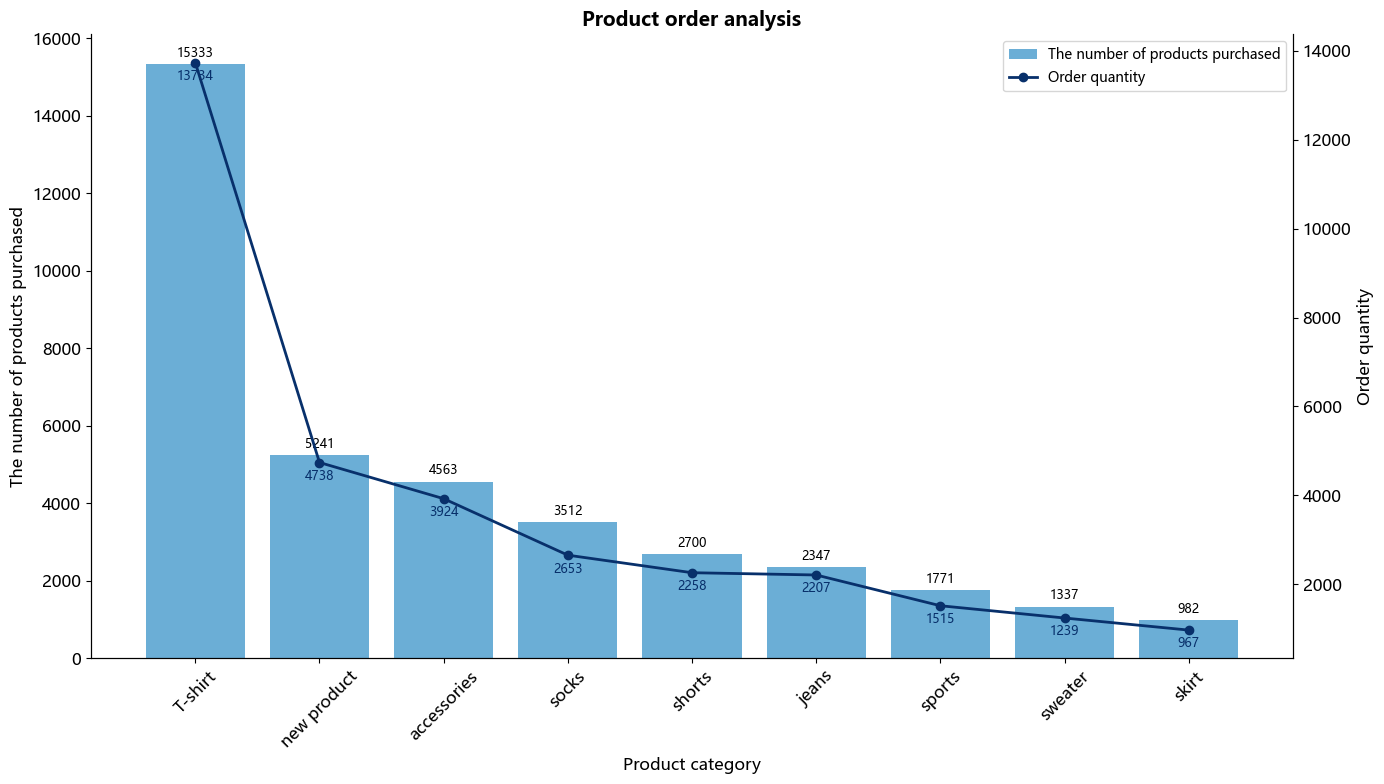

In [31]:
df_order = UNIQLO_cleaned.copy()  

summary = df_order.groupby('Product category')[['Order quantity', 'The number of products purchased']].sum().reset_index()

summary = summary.sort_values(by='The number of products purchased', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

# Set colors
bar_color = '#6BAED6'
line_color = '#08306B'

# Bar chart
bars = ax1.bar(
    summary['Product category'],
    summary['The number of products purchased'],
    color=bar_color,
    label='The number of products purchased'
)
ax1.set_ylabel('The number of products purchased', fontsize=12)
ax1.set_xlabel('Product category', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Product order analysis', fontsize=14, fontweight='bold')

# Set numerical label for bar chart
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Line chart
ax2 = ax1.twinx()
line = ax2.plot(
    summary['Product category'],
    summary['Order quantity'],
    color=line_color,
    marker='o',
    linewidth=2,
    label='Order quantity'
)
ax2.set_ylabel('Order quantity', fontsize=12)

# Set numerical label for line chart
for i, value in enumerate(summary['Order quantity']):
    ax2.annotate(f'{int(value)}',
                 xy=(i, value),
                 xytext=(0, -10),
                 textcoords="offset points",
                 ha='center', va='center',
                 fontsize=9, color=line_color)

# Merge the cahrt
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper right', fontsize=10)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


In [32]:
# Data analysis -- Product dimension -- Treemap

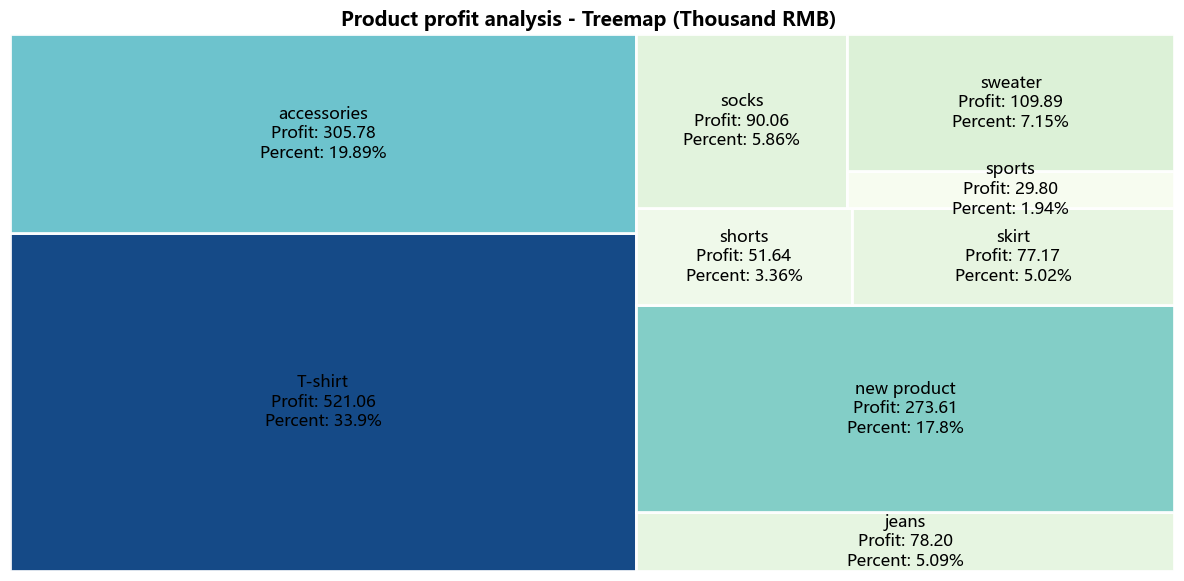

In [33]:
df_tree = UNIQLO_cleaned.copy()

# Calculate the total profit of each product category
profit_summary = df_tree.groupby('Product category')['Profit'].sum().reset_index()

# Calculate the total profit and its proportion
total_profit = profit_summary['Profit'].sum()
profit_summary['Percent'] = (profit_summary['Profit'] / total_profit * 100).round(2)

# Set label
profit_summary['Label'] = profit_summary.apply(
    lambda row: f"{row['Product category']}\nProfit: {row['Profit']/1000:.2f}\nPercent: {row['Percent']}%", axis=1
)

# Create a smoother color gradient
percentages = profit_summary['Percent']
cmap = plt.colormaps["GnBu"]  
norm = mcolors.Normalize(vmin=min(percentages), vmax=max(percentages))
colors = [cmap(norm(p)) for p in percentages]

# Draw the treemap
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=profit_summary['Profit'],
    label=profit_summary['Label'],
    color=colors,
    alpha=0.95,
    edgecolor='white',
    linewidth=2,
    text_kwargs={'fontsize': 12}
)

plt.axis('off')
plt.title("Product profit analysis - Treemap (Thousand RMB) ", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [34]:
# Data analysis -- Customer dimension -- Age group

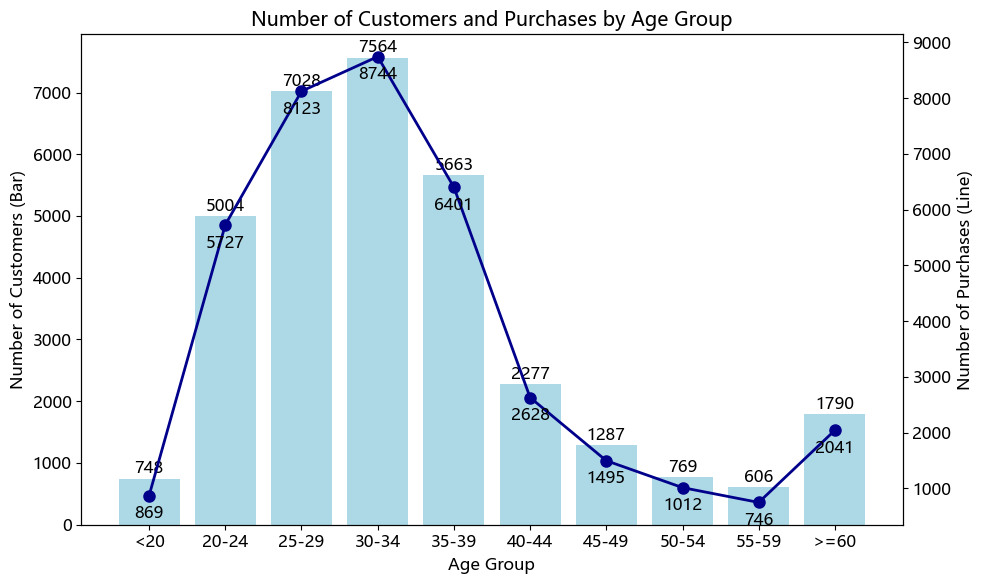

In [35]:
df_ag = UNIQLO_cleaned.copy()

age_customer_counts = df_ag.groupby('Age')['The number of customers'].sum()

age_purchase_counts = df_ag.groupby('Age')['The number of products purchased'].sum()

# Sort the age groups
ordered_age_groups = ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '>=60']
age_customer_counts = age_customer_counts[ordered_age_groups]
age_purchase_counts = age_purchase_counts[ordered_age_groups]

# Create a figure with two subplots: one for the bar chart and one for the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for the number of customers with custom colors
ax1.bar(age_customer_counts.index, age_customer_counts, color='lightblue')

# Label the bars with the number of customers
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7), textcoords='offset points')
    
# Create a second y-axis for the line plot (number of purchases)
ax2 = ax1.twinx()
# Plot the line graph for the number of purchases with custom colors
ax2.plot(age_purchase_counts.index, age_purchase_counts, color='darkblue', marker='o', linestyle='-', linewidth=2, markersize=8)

# Label the line graph with the number of purchases below the lines
for i, value in enumerate(age_purchase_counts):
    ax2.annotate(f'{value:.0f}', (age_purchase_counts.index[i], value), 
                 ha='center', va='top', fontsize=12, color='black', xytext=(0, -7), textcoords='offset points')
    
# Set titles and labels with black color
ax1.set_title('Number of Customers and Purchases by Age Group', fontsize=14, color='black')
ax1.set_xlabel('Age Group', fontsize=12, color='black')
ax1.set_ylabel('Number of Customers (Bar)', color='black', fontsize=12)
ax2.set_ylabel('Number of Purchases (Line)', color='black', fontsize=12)

ax1.grid(False)

plt.tight_layout()
plt.show()


In [36]:
# Data analysis -- Customer dimension -- Pie chart

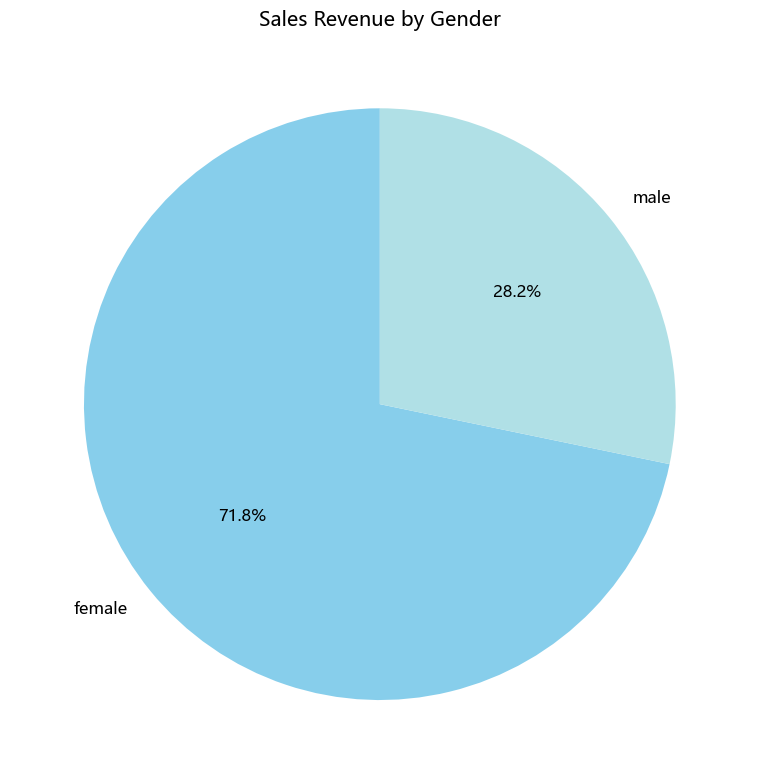

In [37]:
df_pc = UNIQLO_cleaned.copy()

gender_sales_latest_2 = df_pc.groupby('Gender')['Sales revenue'].sum()

# Create a pie chart 
plt.figure(figsize=(8, 8))
gender_sales_latest_2.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#B0E0E6'], legend=False)
plt.title('Sales Revenue by Gender')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [38]:
# Data analysis -- Customer dimension -- Number of Purchases by Channel and Gender

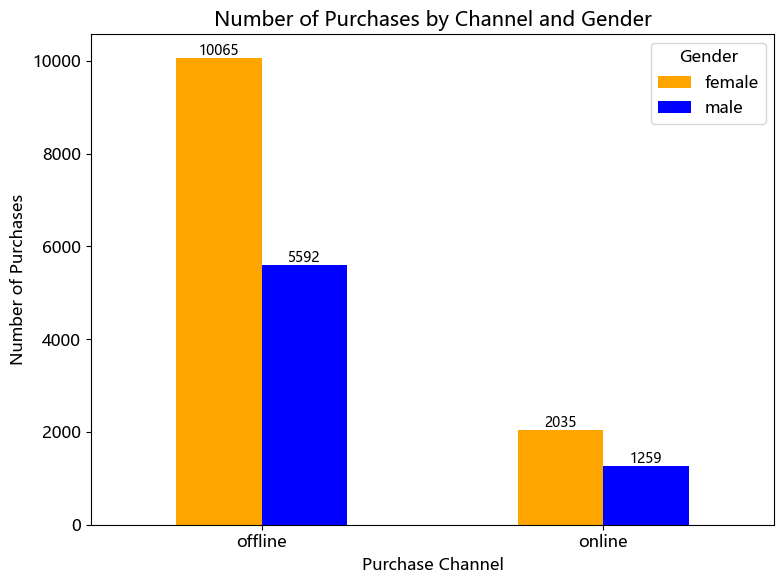

In [39]:
df_pcg = UNIQLO_cleaned.copy()

# Create a crosstab to count the number of purchases by 'Channel' and 'Gender'
purchase_by_channel_gender = pd.crosstab(df_pcg['Channel'], df_pcg['Gender'])

# Create a bar chart to visualize the purchase counts by gender and channel
ax = purchase_by_channel_gender.plot(kind='bar', stacked=False, color=['orange', 'blue'], figsize=(8, 6))

# Label the bars with the specific number of purchases
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Number of Purchases by Channel and Gender')
plt.xlabel('Purchase Channel')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)

ax.grid(False)

plt.tight_layout()
plt.show()


In [40]:
# Data analysis -- Customer dimension -- Time Preference for Purchases by Day of the Week

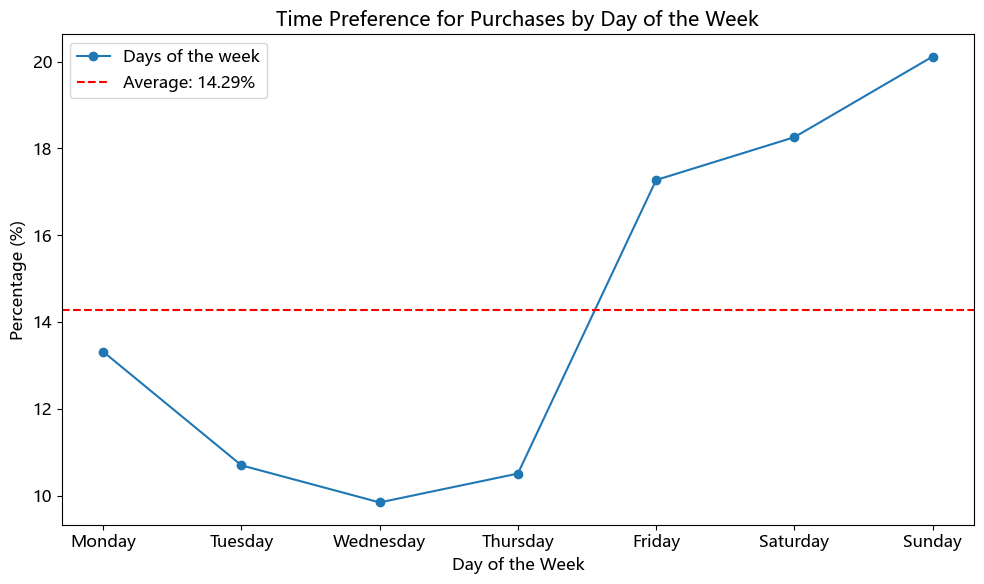

In [41]:
df_tp = UNIQLO_cleaned.copy()
day_counts = df_tp['Days of the week'].value_counts(normalize=True) * 100

# Sort the days of the week in a logical order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts[ordered_days]

# Calculate the average percentage
average_percentage = day_counts.mean()

# Create a line plot to visualize the time preference for purchases
plt.figure(figsize=(10, 6))
day_counts.plot(kind='line', marker='o')

# Adding average line
plt.axhline(y=average_percentage, color='r', linestyle='--', label=f'Average: {average_percentage:.2f}%')


# Customize the plot
plt.title('Time Preference for Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage (%)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
# Data analysis -- Regional dimension -- Sales by city

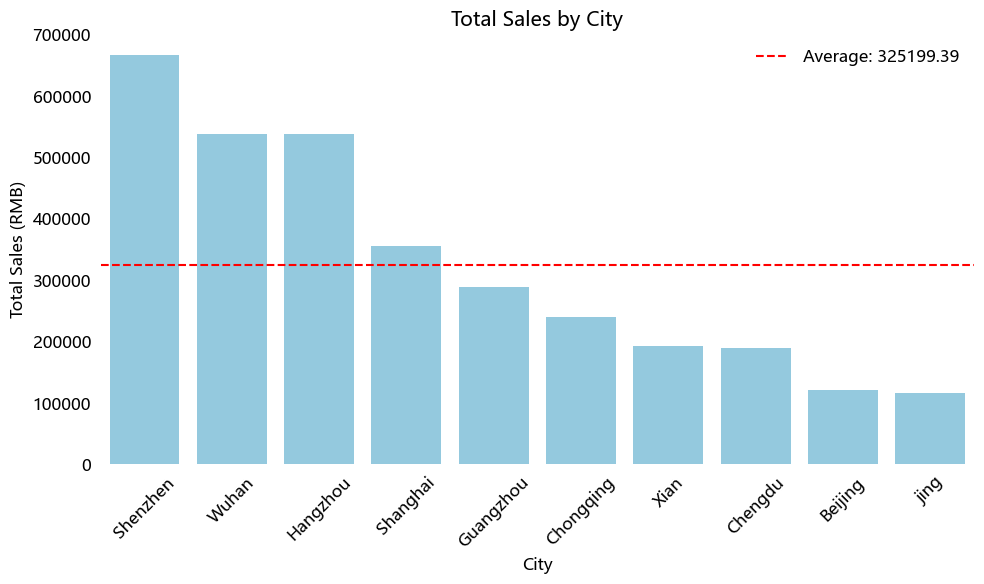

In [43]:
import seaborn as sns
from matplotlib import font_manager as fm

# read Excel file
df_sc = UNIQLO_cleaned.copy()

# (Location) calculate the profit depends on different cities
sales_by_city = df_sc.groupby("Location")["Sales revenue"].sum().sort_values(ascending=False)

# Graphing
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, color='skyblue')

#  Remove all border lines (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#  Remove tick marks
plt.tick_params(left=False, bottom=False)

# Add average line
plt.axhline(y=sales_by_city.mean(), color='red', linestyle='--', label=f'Average: {sales_by_city.mean():.2f}')

# Labels
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales (RMB)")
plt.title("Total Sales by City")
plt.xticks(rotation=45)

# Legend
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [44]:
# Data analysis -- Regional dimension -- Online vs Offline Sales Quantity by City

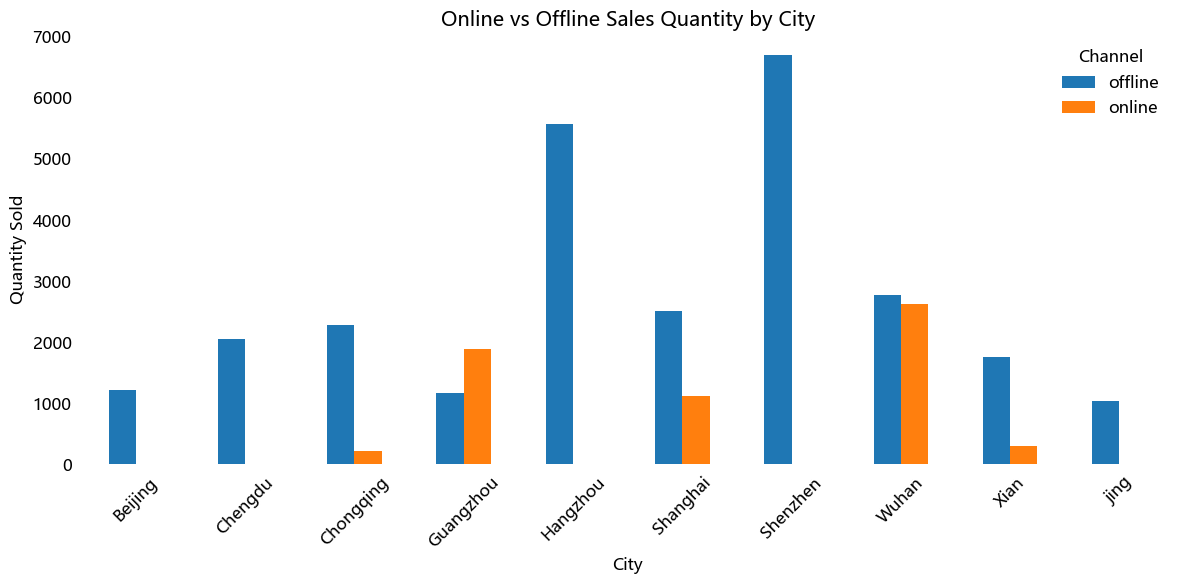

In [45]:
df_oo= UNIQLO_cleaned.copy()

# Establish graph based on sales and cities
channel_sales = df_oo.groupby(["Location", "Channel"])["Order quantity"].sum().unstack().fillna(0)

# assign plot to a variable so we can modify it
ax = channel_sales.plot(kind="bar", figsize=(12, 6))

# Remove all spines (top, bottom, left, right)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Title and labels
plt.title("Online vs Offline Sales Quantity by City")
plt.ylabel("Quantity Sold")
plt.xlabel("City")
plt.xticks(rotation=45)

# Legend without frame
plt.legend(title="Channel", frameon=False)

plt.tight_layout()
plt.show()

In [46]:
# Data analysis -- Regional dimension -- Total profit by City

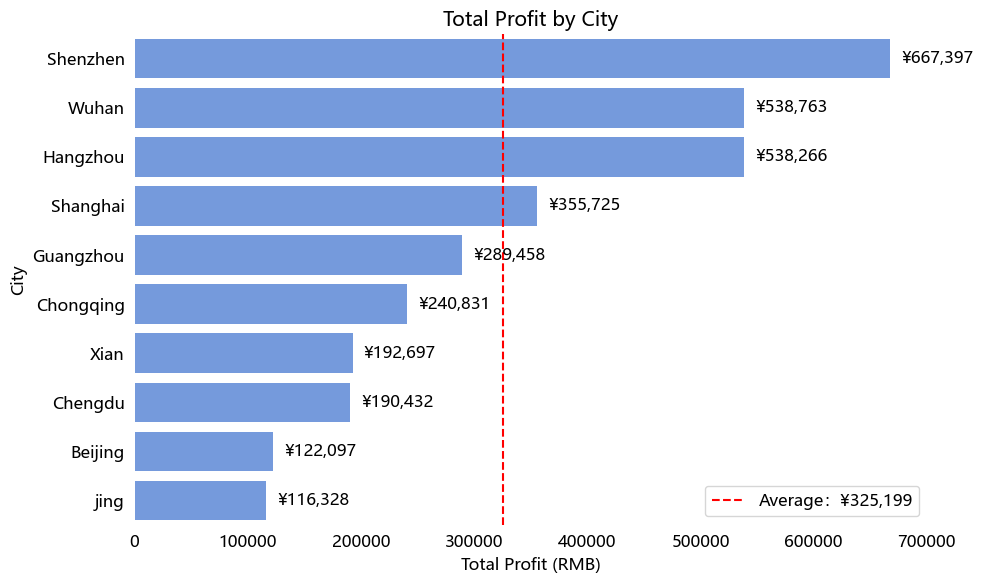

In [47]:
import seaborn as sns

df_tpc = UNIQLO_cleaned.copy()

# Group by city and sum sales
sales_by_city = df_tpc.groupby("Location")["Sales revenue"].sum().sort_values(ascending=False)

# Create figure and get Axes
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_city.values, y=sales_by_city.index, color='cornflowerblue')

# Add average line
avg = sales_by_city.mean()
ax.axvline(x=avg, color='red', linestyle='--', label=f'Average：¥{avg:,.0f}')

# Add value labels (with commas and ¥)
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 10000,  # adjust spacing
        bar.get_y() + bar.get_height() / 2,
        f'¥{width:,.0f}',
        ha='left',
        va='center'
    )

# Labels and title
ax.set_xlabel("Total Profit (RMB)")
ax.set_ylabel("City")
ax.set_title("Total Profit by City")
ax.legend()

# Remove all spines and tick marks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

In [48]:
# Data analysis -- Regional dimension -- Product profit analysis Treemap

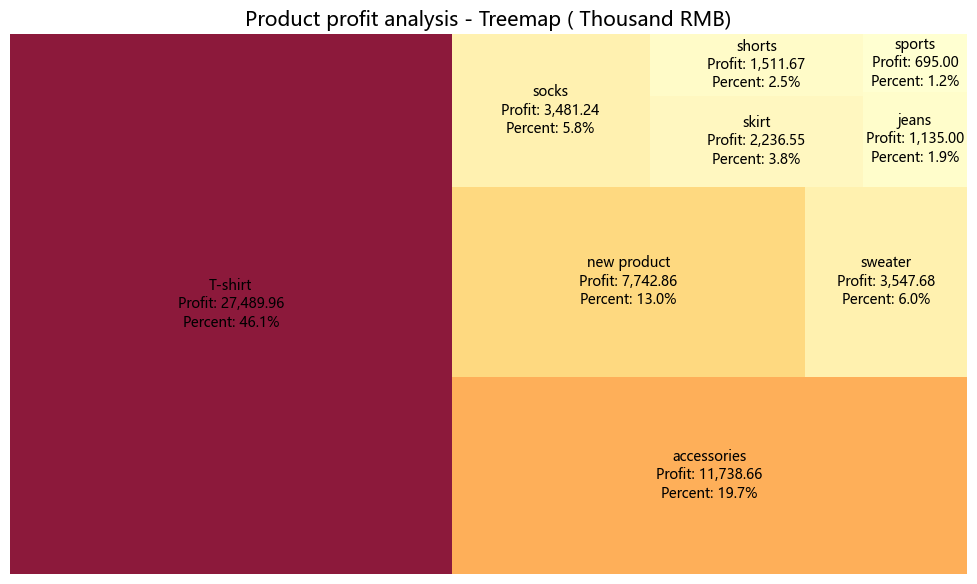

In [49]:
df_ppt= UNIQLO_cleaned.copy()

# Filter for Beijing
beijing_df = df_ppt[df_ppt["Location"] == "Beijing"]

# Calculate profit by product category
profit_by_product = beijing_df.groupby("Product category")["Profit"].sum().sort_values(ascending=False)

# Total profit and percentages
total_profit = profit_by_product.sum()
percentages = profit_by_product / total_profit

# Labels
labels = [
    f"{category}\nProfit: {profit:,.2f}\nPercent: {percent:.1%}"
    for category, profit, percent in zip(profit_by_product.index, profit_by_product.values, percentages)
]

#  Red color scale
cmap = plt.colormaps["YlOrRd"]
norm = mcolors.Normalize(vmin=min(percentages), vmax=max(percentages))
colors = [cmap(norm(p)) for p in percentages]

# Plot
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=profit_by_product.values,
    label=labels,
    color=colors,
    alpha=0.9,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)

plt.title("Product profit analysis - Treemap ( Thousand RMB)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [50]:
# Data analysis -- Regional dimension -- Heatmap

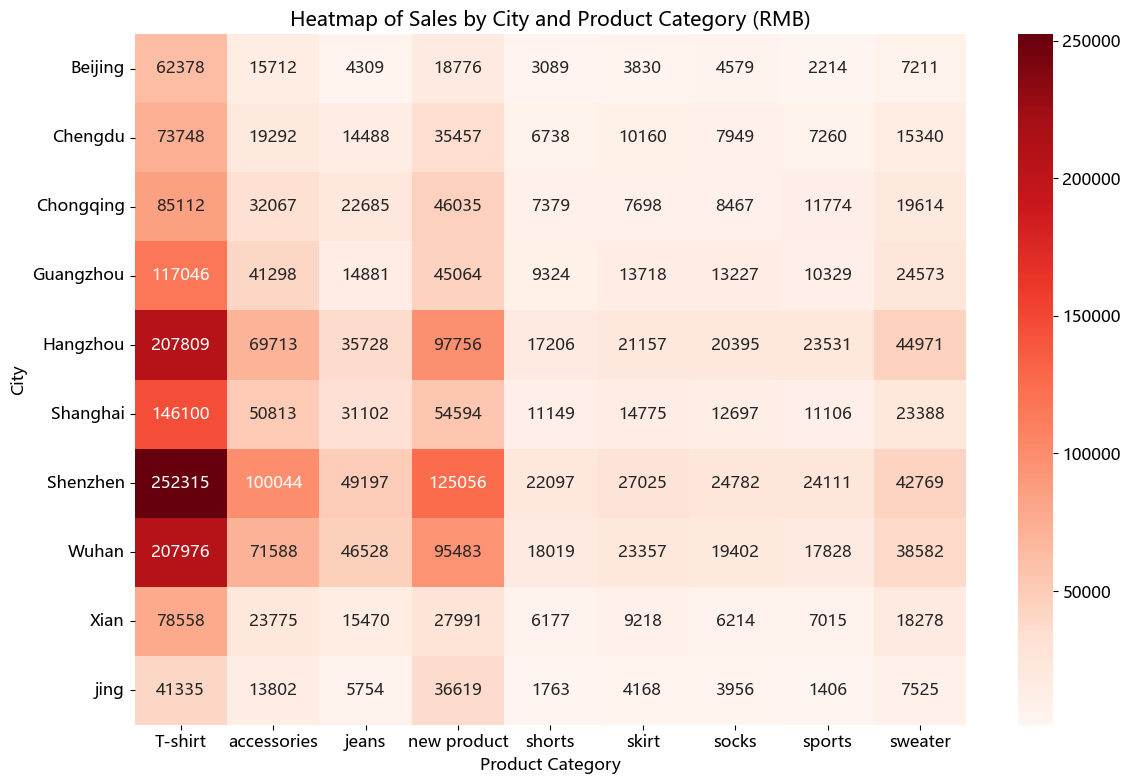

In [51]:
df_heatmap = UNIQLO_cleaned.copy()

# Establish heatmap based on cities and product category
pivot_table = df_heatmap.pivot_table(values="Sales revenue", index="Location", columns="Product category", aggfunc="sum", fill_value=0)

# graphing
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Reds")
plt.title("Heatmap of Sales by City and Product Category (RMB)")
plt.ylabel("City")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

In [52]:
# Data analysis -- Time dimension -- Weekly Sales Revenue Trend

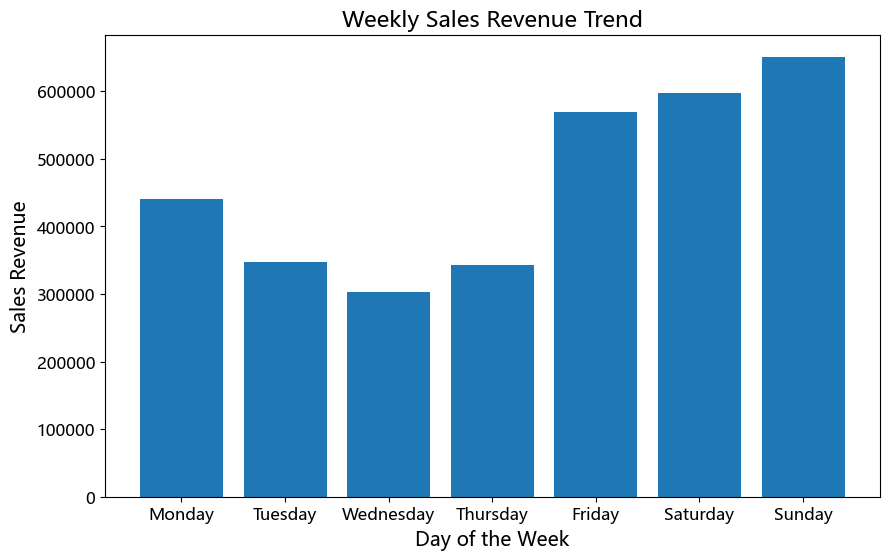

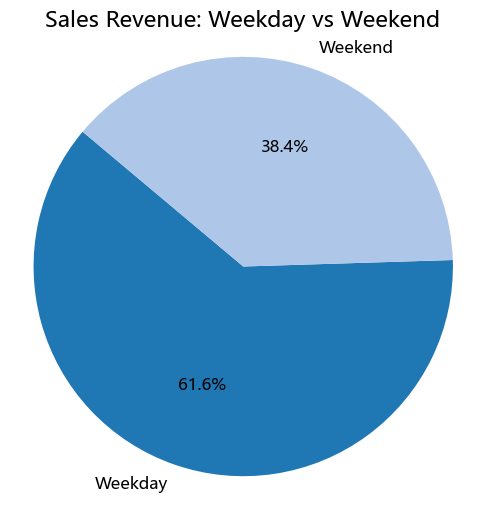

In [53]:
df_time = UNIQLO_cleaned.copy()


df_time['Order date'] = pd.to_datetime(df_time['Order date'])
df_time['Month'] = df_time['Order date'].dt.month
df_time['Weekday'] = df_time['Order date'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df_time['Season'] = df_time['Month'].apply(get_season)



monthly_sales = df_time.groupby('Month')['Sales revenue'].sum().reset_index()

weekday_sales = df_time.groupby('Weekday')['Sales revenue'].sum().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales_sorted = weekday_sales.set_index('Weekday').loc[weekday_order].reset_index()

df_time['Is_Weekend'] = df_time['Weekday'].isin(['Saturday', 'Sunday'])
weekend_vs_weekday = df_time.groupby('Is_Weekend')['Sales revenue'].sum().reset_index()

weekend_vs_weekday = weekend_vs_weekday.sort_values(by='Is_Weekend')


seasonal_sales = df_time.groupby('Season')['Sales revenue'].sum().reset_index()
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonal_sales_sorted = seasonal_sales.set_index('Season').loc[season_order].reset_index()

primary_blue = "#1f77b4"    
secondary_blue = "#aec7e8"  



# Weekly Sales Revenue Trend
plt.figure(figsize=(10, 6))
plt.bar(weekday_sales_sorted['Weekday'], weekday_sales_sorted['Sales revenue'], color=primary_blue)
plt.title('Weekly Sales Revenue Trend', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Sales Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Sales Revenue: Weekday vs Weekend
plt.figure(figsize=(6, 6))
labels = ['Weekday', 'Weekend']
colors = [primary_blue, secondary_blue]
plt.pie(weekend_vs_weekday['Sales revenue'], labels=labels, autopct='%1.1f%%', 
        startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Sales Revenue: Weekday vs Weekend', fontsize=16)
plt.axis('equal')  
plt.show()
